## Where do embeddings come from?

### Embedding of MNIST images

Notwendige Pakete: Scikit Learn und Tensorflow

In [ ]:
# pip install tensorflow
# pip install scipy

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from scipy.stats import norm

MNIST ist bereits als Datensatz in Keras verfügbar. Wir laden die Bilder herunter und skalieren die Werte.

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

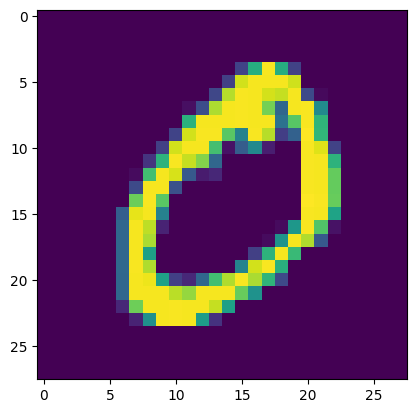

In [23]:
# Example of a training image
plt.imshow(X_train[1]);

Wir wandeln die zweidimensionalen Bilder in Vektoren der Länge 28x28=784 um.

In [24]:
X_train = X_train.reshape((len(X_train)), np.prod(X_train.shape[1:]))
X_test = X_test.reshape((len(X_test)), np.prod(X_test.shape[1:]))

Aufbau unseres Neuronalen Netzes: ein simpler Autoencoder

In [48]:
encoding_dim = 36

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(encoding_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

c:\Users\Kratsch\.conda\envs\KIVorlesung\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Der Autoencoder wird trainiert: er soll die Trainingsdaten aus den Trainingsdaten möglichst gut vorhersagen.

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, 
          X_train,
          epochs=10,
          batch_size=256,
          shuffle=True,
          validation_data=(X_test, X_test)
          )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3301 - val_loss: 0.1481
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1399 - val_loss: 0.1179
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1163 - val_loss: 0.1070
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1070 - val_loss: 0.1012
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1017 - val_loss: 0.0976
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0984 - val_loss: 0.0958
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0957 - val_loss: 0.0927
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0934 - val_loss: 0.0909
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0918 - val_loss: 0.0895
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0904 - val_loss: 0.0884


Der Autoencoder wird angewendet: er bekommt die Testdaten als Input und wir speichern den Output.

In [50]:
reconstructed_imgs = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Wir geben den Output als Bild aus - die Rekonstruktion sieht garnicht so schlecht aus!

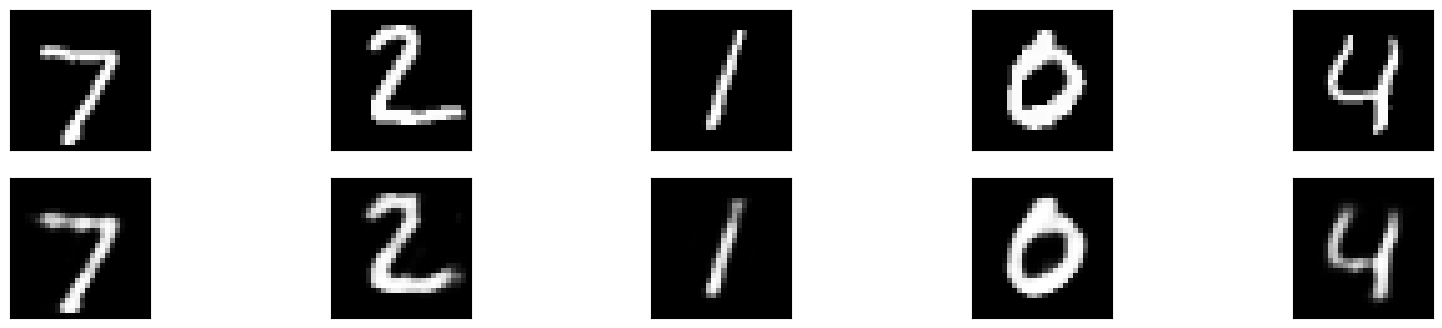

In [51]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Wir visualisieren die Embeddings, indem wir den Encoder aus dem Modell extrahieren:

In [52]:
from keras.models import Sequential
from keras.layers import Dense

encoder = Sequential()
for layer in model.layers[:2]:
    encoder.add(layer)

# encoder.summary()

In [55]:
latent_images = encoder.predict(X_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


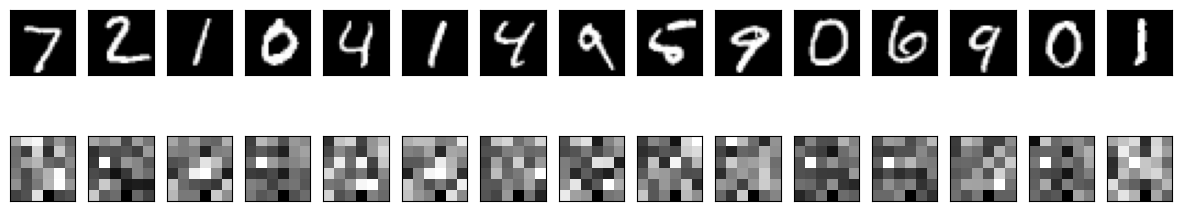

In [61]:
n = 15
plt.figure(figsize=(15, 3))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(latent_images[i].reshape(6, 6))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)